In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.offline as py
import plotly.graph_objs as go

In [2]:
def data_reading_cleaning():
    '''
    data reading and cleaning
    make sure degrees-that-pay-back.csv, salaries-by-college-type.csv, salaries-by-region.csv
    are in the same folder of this script
    if you dont have those data, please download it at: https://www.kaggle.com/wsj/college-salaries
    '''
    def string_dollar_to_integer(data, column):
        '''
        change string dollar to integer dollar
        example : $75,000.00 to 75000
        data: pandas.core.frame.DataFrame
        column: valid column name in data
        '''
        assert isinstance(column, str)
        assert data.columns.contains(column)
        data[column] = data[column].apply(lambda x: int(x.replace(",","").strip('$').split('.')[0]) if isinstance(x, str) else x)
    Degree_df = pd.read_csv("./degrees-that-pay-back.csv")
    College_df = pd.read_csv("./salaries-by-college-type.csv")
    Region_df = pd.read_csv("./salaries-by-region.csv")
    for df in [Degree_df, College_df, Region_df]:
        string_dollar_to_integer(df, 'Starting Median Salary')
        string_dollar_to_integer(df, 'Mid-Career Median Salary')
        string_dollar_to_integer(df, 'Mid-Career 10th Percentile Salary')
        string_dollar_to_integer(df, 'Mid-Career 25th Percentile Salary')
        string_dollar_to_integer(df, 'Mid-Career 75th Percentile Salary')
        string_dollar_to_integer(df, 'Mid-Career 90th Percentile Salary')
    return Degree_df, College_df, Region_df

In [3]:
def visulize_salaries_majors(Degree_df):
    '''
    Degree_df : pandas.core.frame.DataFrame
    plot major vs salaries sorting by starting salaries.
    '''
    Degree_df = Degree_df.sort_values("Starting Median Salary", ascending=False).reset_index(drop=True)
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,12), sharey=True)
    ax = axs[0]
    ax.set_yticklabels(Degree_df['Undergraduate Major'], rotation='horizontal', fontsize='large')
    g = sns.barplot(y = Degree_df['Undergraduate Major'], x= Degree_df['Starting Median Salary'],ax=axs[0])
    g = sns.barplot(y = Degree_df['Undergraduate Major'], x= Degree_df['Mid-Career Median Salary'],ax=axs[1])
    plt.show()

In [4]:
def visulize_starting_mid_difference(Degree_df):
    '''
    Degree_df : pandas.core.frame.DataFrame
    plot percent of increase of starting salaries and mid-career salaries.
    '''
    Feature = Degree_df['Undergraduate Major']
    weightage = Degree_df['Starting Median Salary']
    total = Degree_df['Mid-Career Median Salary']
    percent = Degree_df['Percent change from Starting to Mid-Career Salary']
    mid_pos = (Degree_df['Starting Median Salary'] + Degree_df['Mid-Career Median Salary']) / 2
    weightage = np.array(weightage)
    Feature = np.array(Feature)
    total = np.array(total)
    percent = np.array(percent)
    mid_pos  = np.array(mid_pos)

    idx = weightage.argsort()
    Feature, total, percent, mid_pos, weightage = [np.take(x, idx) for x in [Feature, total, percent, mid_pos , weightage]]
    s = 1
    size=[]
    for i, cn in enumerate(weightage):
        s = s + 1        
        size.append(s)
    fig, ax = plt.subplots(figsize=(8, 16))
    ax.scatter(total,size,marker="o", color="lightBlue", s=size, linewidths=10)
    ax.scatter(weightage,size,marker="o", color="LightGreen", s=size, linewidths=10)
    ax.set_xlabel('Median Salary')
    ax.set_ylabel('Undergraduate Major')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.grid()
    for i, txt in enumerate(Feature):
        ax.annotate(txt, (110000,size[i]),fontsize=12,rotation=0,color='Brown')
        ax.annotate('.', xy=(total[i], size[i]), xytext=(weightage[i], size[i]),
            arrowprops=dict(facecolor='LightGreen', shrink=0.06),
            )
    for i, pct in enumerate(percent):
         ax.annotate(pct, (mid_pos[i],size[i]),fontsize=12,rotation=0,color='Brown')

    ax.annotate('Starting median Salary', (35000,52),fontsize=14,rotation=0,color='Green')
    ax.annotate('Mid-Career median Salary', (35000,53),fontsize=14,rotation=0,color='Blue');
    ax.annotate('.', xy=(110000, 52.5), xytext=(68000, 52.5),
                arrowprops=dict(facecolor='LightGreen', shrink=0.06),)
    ax.annotate('Percent increase in the salary', (70000,53),fontsize=14,rotation=0,color='Brown');

In [5]:
def visualize_salaries_increase_detail(Degree_df):
    '''
    Degree_df : pandas.core.frame.DataFrame
    plot detail of staring, Mid-Career 10th, 25th, 75th, 90th, percentile salary. 
    '''
    py.init_notebook_mode(connected=True)
    # Sorted dataset
    majors_sort_mid90 = Degree_df.sort_values("Starting Median Salary", ascending=True)
    # Method that shortens long texts
    def cut_name(x):
        if len(x) <= 25:
            return x
        else:
            return x[0:22] + "..."

    # Prepared information
    traces = {
        "Starting Median Salary" : {
            "name" : "Starting Median Salary",
            "color" : "rgba(255, 114, 114, 0.7)",
            "line_color" : "rgba(255, 114, 114, 1.0)"
        },
        "Mid-Career 10th Percentile Salary": {
            "name" : "Mid-Career 10th Percentile Salary",
            "color" : "rgba(255, 202, 120, 0.7)",
            "line_color" : "rgba(255, 202, 120, 1.0)"
        },
        "Mid-Career 25th Percentile Salary" : {
            "name" : "Mid-Career 25th Percentile Salary",
            "color" : "rgba(253, 255, 88, 0.7)",
            "line_color" : "rgba(253, 255, 88, 1.0)"
        },
        "Mid-Career 75th Percentile Salary" : {
            "name" : "Mid-Career 75th Percentile",
            "color" : "rgba(153, 255, 45, 0.7)",
            "line_color" : "rgba(153, 255, 45, 1.0)"
        },
       "Mid-Career 90th Percentile Salary": {
            "name" : "Mid-Career 90th Percentile",
            "color" : "rgba(49, 255, 220, 0.7)",
            "line_color" : "rgba(49, 255, 220, 1.0)"
        }
    }

    # List that stores information about data traces
    data = []
    # Single trace 
    for key, value in traces.items():
        trace = go.Scatter(
            x = majors_sort_mid90[key].tolist(),
            y = majors_sort_mid90['Undergraduate Major'].apply(cut_name).tolist(),
            name = value["name"],
            mode = 'markers',
            marker=dict(
                color = value["color"],
                line=dict(
                    color = value["line_color"],
                    width=2,
                ),
                symbol="hexagon-dot",
                size=10
            ),
        )
        data.append(trace)

    # Chart layout
    layout = go.Layout(
        title = 'Biggest money makers',
        width=850,
        height=1200,
        margin=go.layout.Margin(
            l=180,
            r=50,
            b=80,
            t=80,
            pad=10
        ),
        paper_bgcolor='rgb(244, 238, 225)',
        plot_bgcolor='rgb(244, 238, 225)',
        yaxis = dict(
            anchor = 'x',
            rangemode='tozero',
            tickfont=dict(
                size=10
            ),
            ticklen=1
        ),   
        legend=dict(x=0.6, y=0.07)
    )

    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

# Report of Question 1

In [6]:
Degree_df, College_df, Region_df = data_reading_cleaning()
Degree_df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000,77100,67.6,42200,56100,108000,152000
1,Aerospace Engineering,57700,101000,75.0,64300,82100,127000,161000
2,Agriculture,42600,71900,68.8,36300,52100,96300,150000
3,Anthropology,36800,61500,67.1,33800,45500,89300,138000
4,Architecture,41600,76800,84.6,50600,62200,97000,136000


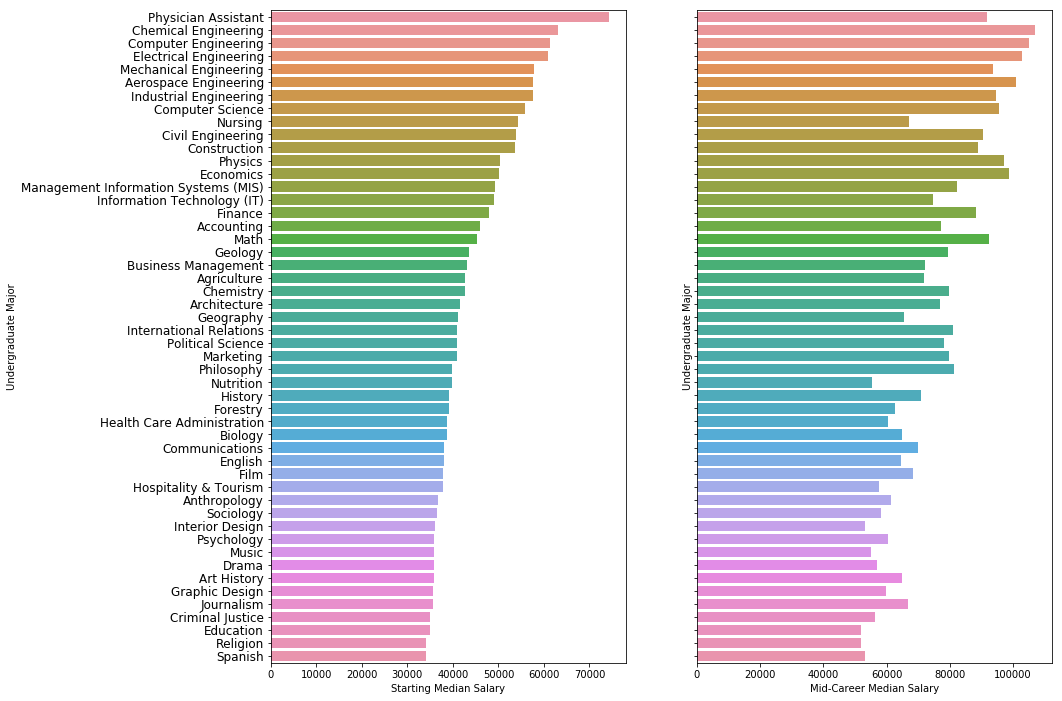

In [7]:
visulize_salaries_majors(Degree_df)

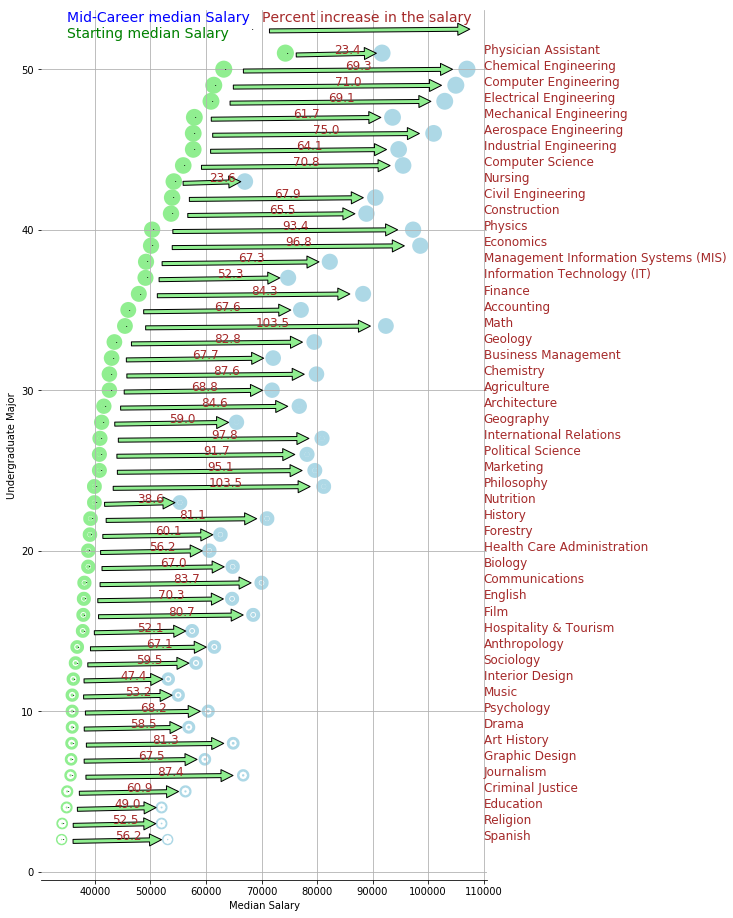

In [8]:
visulize_starting_mid_difference(Degree_df)

In [9]:
visualize_salaries_increase_detail(Degree_df)